<a href="https://colab.research.google.com/github/YoderLN/ML1CourseWork/blob/main/Wine_Quality_V2_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project is an improvement over earlier submission, goal is to train a model to predict the Quality score of wines.

First submission used Linear Regression and limited feature scaling, this version intends to incorporate better scaling and an ensemble model

# Setup

Import python 3.7

In [ ]:
import sys

assert sys.version_info >= (3, 7)

Import pandas, numpy and matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(72)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Get The Data

Mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

import data from google drive

In [ ]:
white= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-white.csv', sep=';')

# Create Training and Test subsets

Split dataset into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(white, test_size=0.2, random_state=72)

In [ ]:

##
##features = white.drop(['quality'],axis=1)
##labels = white['quality']

##features_train, features_test, labels_train, labels_test = train_test_split(features, labels ,test_size=.2, random_state=72)



Verify results match expectations

In [ ]:
len(white)

4898

In [ ]:
len(train_set)

3918

In [ ]:
len(test_set)

980

# Data exploration

Generate copy of training data for exploration usage

In [ ]:
white_copy = train_set.copy()

Loan data header and initial entries

In [ ]:
white_copy.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
113,6.7,0.41,0.34,9.2,0.049,29.0,150.0,0.99680,3.22,0.51,9.1,5
1167,7.4,0.23,0.43,1.4,0.044,22.0,113.0,0.99380,3.22,0.62,10.6,6
2898,8.6,0.18,0.28,0.8,0.032,25.0,78.0,0.99104,2.99,0.38,11.1,5
614,7.5,0.21,0.68,10.9,0.045,38.0,133.0,0.99780,3.00,0.36,8.7,5
4855,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.0,6


Wine data features

In [ ]:
white_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3918 entries, 113 to 4568
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3918 non-null   float64
 1   volatile acidity      3918 non-null   float64
 2   citric acid           3918 non-null   float64
 3   residual sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free sulfur dioxide   3918 non-null   float64
 6   total sulfur dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   pH                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
 11  quality               3918 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 397.9 KB


Wine describe

In [ ]:
white_copy.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000,3918.000000
mean,6.854109,0.276803,0.334247,6.395916,0.046040,35.461460,138.143185,0.994024,3.188081,0.489160,10.510949,5.878765
std,0.839236,0.099377,0.119258,5.001868,0.022311,17.053032,42.689269,0.002923,0.152686,0.111681,1.227910,0.887236
min,3.800000,0.080000,0.000000,0.600000,0.009000,3.000000,10.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,24.000000,108.000000,0.991740,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.230000,31.600000,0.346000,289.000000,440.000000,1.010300,3.820000,1.010000,14.200000,9.000000


Category visualization

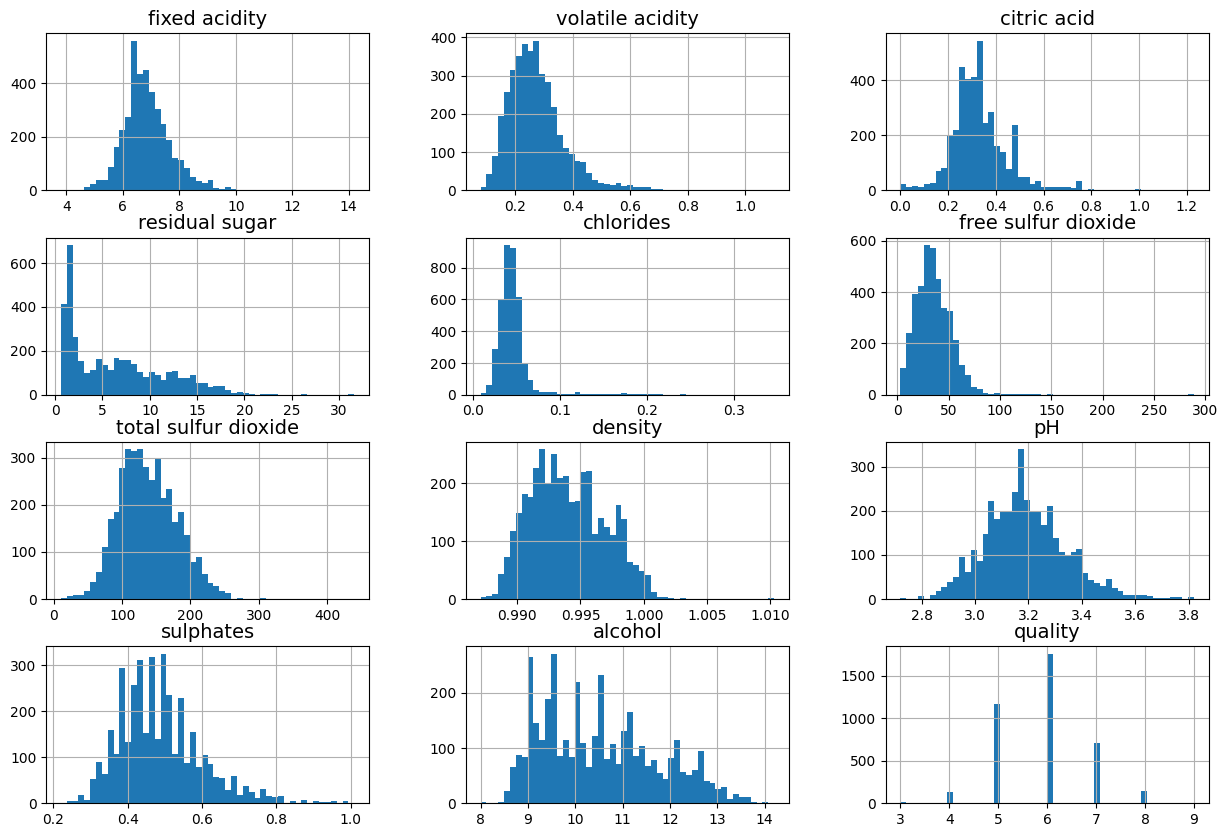

In [ ]:
white_copy.hist(bins=50, figsize=(15, 10))
plt.show()

Corr matrix

In [ ]:
corr_matrix = white_copy.corr(numeric_only = True)
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.429197
pH                      0.086743
sulphates               0.050734
free sulfur dioxide    -0.004704
citric acid            -0.013180
residual sugar         -0.101932
fixed acidity          -0.103716
total sulfur dioxide   -0.187172
volatile acidity       -0.202477
chlorides              -0.214356
density                -0.311755
Name: quality, dtype: float64

free sulfur dioxide and citric acid seem to have lowest corelation, going to drop these features

In [ ]:
white_copy= white_copy.drop(columns=['free sulfur dioxide'])

In [ ]:
white_copy= white_copy.drop(columns= ['citric acid'])

In [ ]:
corr_matrix = white_copy.corr(numeric_only = True)
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.429197
pH                      0.086743
sulphates               0.050734
residual sugar         -0.101932
fixed acidity          -0.103716
total sulfur dioxide   -0.187172
volatile acidity       -0.202477
chlorides              -0.214356
density                -0.311755
Name: quality, dtype: float64

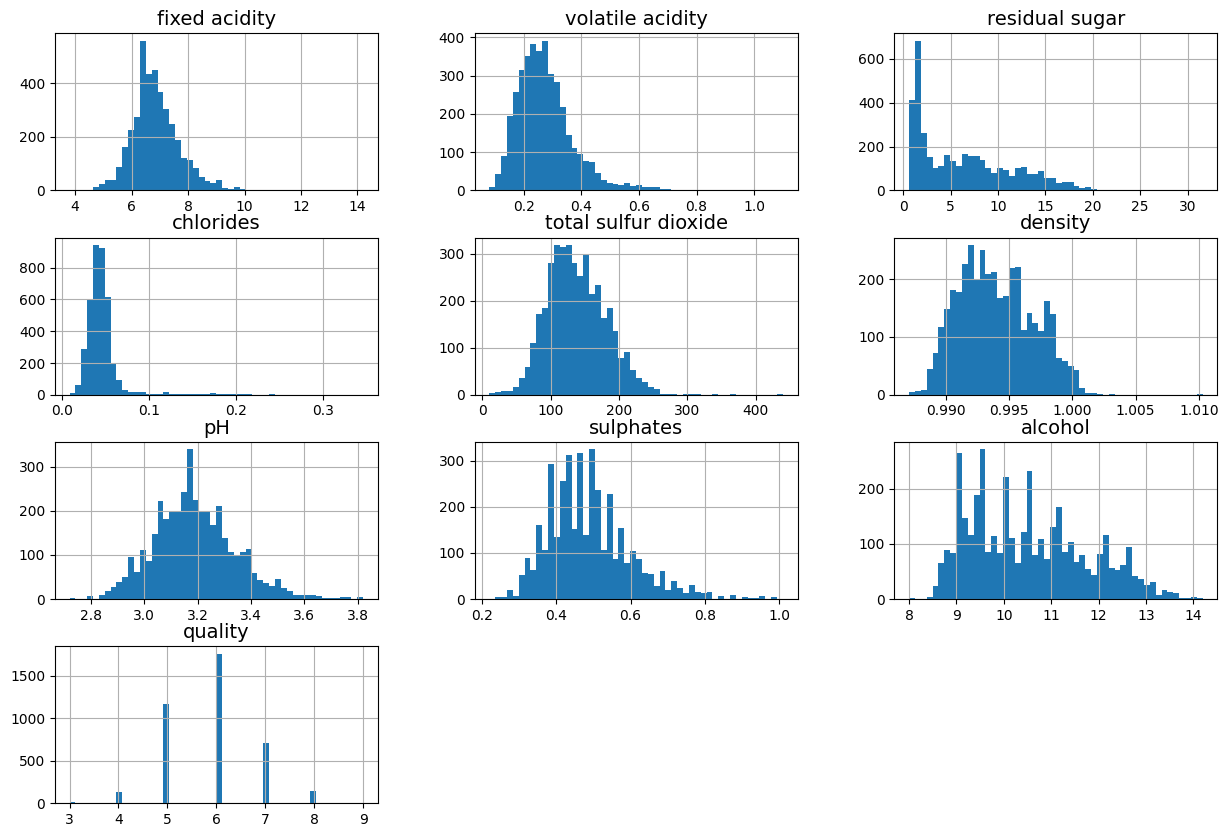

In [ ]:
white_copy.hist(bins=50, figsize=(15, 10))
plt.show()

# Feature Scaling

Smooth out features with tails

In [ ]:
white_copy_num = white_copy.select_dtypes(include=[np.number])

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

white_copy_num_std_scaled = std_scaler.fit_transform(white_copy_num)

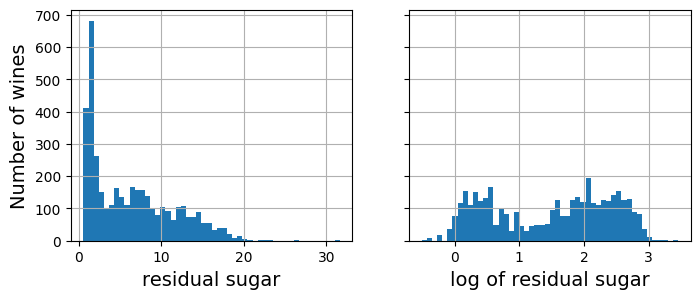

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
white_copy["residual sugar"].hist(ax=axs[0], bins=50)
white_copy["residual sugar"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("residual sugar")
axs[1].set_xlabel("log of residual sugar")
axs[0].set_ylabel("Number of wines")
plt.show()

Initial run did not include any feature scaling or drop any features, fixing tails in this version

In [ ]:
white_copy ["residual sugar"] = white_copy ["residual sugar"].apply (np.log)

In [ ]:
white_copy ["alcohol"] = white_copy ["alcohol"].apply (np.log)

In [ ]:
white_copy ["density"] = white_copy ["density"].apply(np.log)

In [ ]:
white_copy ["volatile acidity"]= white_copy["volatile acidity"].apply(np.log)

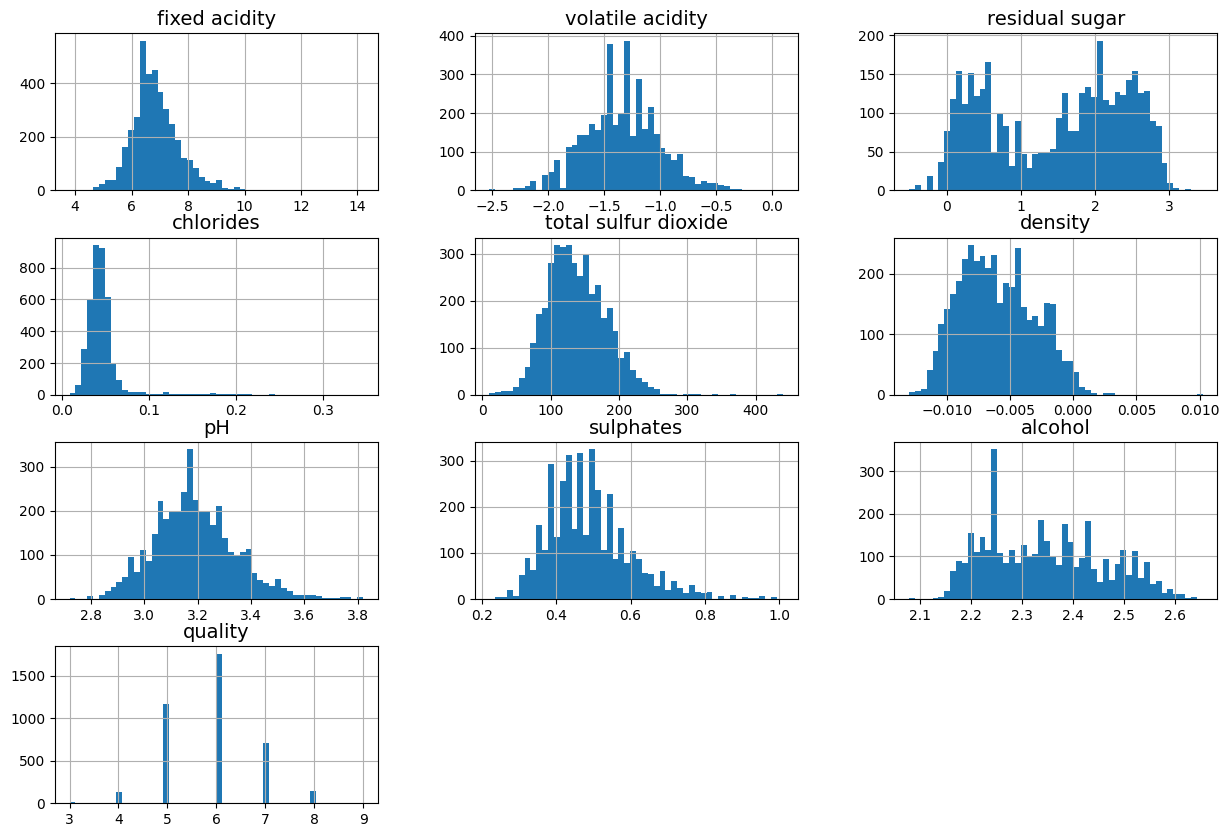

In [ ]:
white_copy.hist(bins=50, figsize=(15, 10))
plt.show()

# Transformation Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", MinMaxScaler()),
])

num_attribs = ["fixed acidity", "volatile acidity",  "residual sugar",
               "chlorides", "total sulfur dioxide","density",
               "pH", "sulphates", "alcohol"]

In [ ]:
white_copy2 = white_copy.drop("quality", axis=1)
white_copy2_labels = white_copy["quality"].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

minmax_scaler = MinMaxScaler()
white_copy_num_std_scaled = minmax_scaler.fit_transform(white_copy_num)

# Model Selection

Import linear regression and test

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs)

])

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(white_copy2, white_copy2_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   MinMaxScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'residual sugar',
                                                   'chlorides', 'density', 'pH',
                                                   'sulphates', 'alcohol'])])),
                ('linearregression', LinearRegression())])

In [ ]:
 white_copy2_predictions = lin_reg.predict(white_copy2)
 white_copy2_predictions[:5]

array([5.26198722, 5.72415408, 5.89493806, 5.39677276, 5.52119956])

In [ ]:
white_copy2_labels.iloc[:5].values

array([5, 6, 5, 5, 6])

In [ ]:

from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(white_copy2_labels, white_copy2_predictions,
                              squared=False)

lin_rmse

0.7576709276197175

75%, good start

Now to try decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=72))
tree_reg.fit(white_copy2, white_copy2_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   MinMaxScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'residual sugar',
                                                   'chlorides', 'density', 'pH',
                                                   'sulphates', 'alcohol'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=72))])

In [ ]:
white_copy2_predictions = tree_reg.predict(white_copy2)
tree_rmse = mean_squared_error(white_copy2_labels, white_copy2_predictions,
                             squared=False)

tree_rmse

0.0

Model is overfit, need to correct before tree would be a good fit

# Linear Regression

Going to trim features with low corelation to simplify model

In [ ]:
num_attribs = ["fixed acidity", "volatile acidity",  "residual sugar",
               "chlorides", "density",
               "pH", "sulphates", "alcohol"]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs)

])

In [ ]:
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(white_copy2, white_copy2_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   MinMaxScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'residual sugar',
                                                   'chlorides', 'density', 'pH',
                                                   'sulphates', 'alcohol'])])),
                ('linearregression', LinearRegression())])

In [ ]:
white_copy2_predictions = lin_reg.predict(white_copy2)
white_copy2_predictions[:5]

array([5.26198722, 5.72415408, 5.89493806, 5.39677276, 5.52119956])

In [ ]:
white_copy2_labels.iloc[:5].values

array([5, 6, 5, 5, 6])

In [ ]:
lin_rmse = mean_squared_error(white_copy2_labels, white_copy2_predictions,
                              squared=False)

lin_rmse

0.7576709276197175

Improvement in prediction by .3, promising. Not quite ready to feed in test data.

# Ensemble Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [ ]:
reg1 = GradientBoostingRegressor(random_state=72)
reg2 = RandomForestRegressor(random_state=72)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(white_copy2, white_copy2_labels)

print(ereg.fit(white_copy2, white_copy2_labels).predict(white_copy2))

[5.20068652 5.86575478 5.69528569 ... 6.45633764 5.16063026 6.26598164]
